# Trabalho 1

## Alunos:
- Diógenes Silva Pedro - 11883476
- Fernando Henrique Paes Generich - 11795342
- Marco Antonio Ribeiro de Toledo - 11796419
- Milena Corrêa da Silva - 11795401

Primeiro vamos importar as bibliotecas necessárias

In [1]:
# %pip install glfw numpy PyOpenGL
import glfw
from OpenGL.GL import *
import OpenGL.GL.shaders
import numpy as np
import math

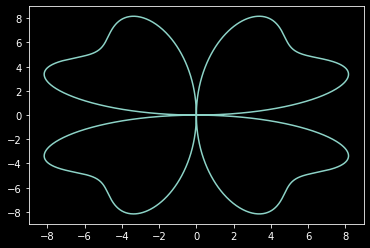

In [2]:
# Creating all the points of the quadrifolium for the spaceship movement

import matplotlib.pyplot as plt

rads = np.arange(0, (2 * np.pi), 0.0025)

a = 10

points = []
for rad in rads:
    r = a * (np.sin(2 * rad) + (np.sin(6 * rad) / 4))
    points.append([r * np.cos(rad), r * np.sin(rad)])

# rad = theta
# r = r

x, y = [], []

for point in points:
    x.append(point[0])
    y.append(point[1])

x = np.array(x)
y = np.array(y)

plt.plot(x, y)

Iniciando janela

In [3]:
glfw.init()
glfw.window_hint(glfw.VISIBLE, glfw.FALSE)
window = glfw.create_window(600, 600, "Cores", None, None)
glfw.window_hint(glfw.RESIZABLE, glfw.FALSE)
glfw.window_hint(glfw.MAXIMIZED, glfw.FALSE)
glfw.make_context_current(window)

Vertex Code


In [4]:
vertex_code = """
        attribute vec2 position;
        uniform mat4 mat_transformation;
        void main(){
            gl_Position = mat_transformation * vec4(position,0.0,1.0);
        }
        """

Fragment Shader

In [5]:
fragment_code = """
        uniform vec4 color;
        void main(){
            gl_FragColor = color;
        }
        """

Requisitando um slot da GPU

In [6]:
# Request a program and shader slots from GPU
program  = glCreateProgram()
vertex   = glCreateShader(GL_VERTEX_SHADER)
fragment = glCreateShader(GL_FRAGMENT_SHADER)

Associando o código fonte aos slots solicitados

In [7]:
# Set shaders source
glShaderSource(vertex, vertex_code)
glShaderSource(fragment, fragment_code)

Compilando com o vertex shader e o fragment shader

In [8]:
# Compile shaders
glCompileShader(vertex)
if not glGetShaderiv(vertex, GL_COMPILE_STATUS):
    error = glGetShaderInfoLog(vertex).decode()
    print(error)
    raise RuntimeError("Erro de compilacao do Vertex Shader")

glCompileShader(fragment)
if not glGetShaderiv(fragment, GL_COMPILE_STATUS):
    error = glGetShaderInfoLog(fragment).decode()
    print(error)
    raise RuntimeError("Erro de compilacao do Fragment Shader")

Associando o programa compilado ao programa principal

In [9]:
# Attach shader objects to the program
glAttachShader(program, vertex)
glAttachShader(program, fragment)

Linkagem do programa

In [10]:
# Build program
glLinkProgram(program)
if not glGetProgramiv(program, GL_LINK_STATUS):
    print(glGetProgramInfoLog(program))
    raise RuntimeError('Linking error')
    
# Make program the default program
glUseProgram(program)

Preparando dados para enviar para a GPU

In [11]:
def create_elements(size):
    return [i for i in range(size)]

In [12]:
# Pontos
verts = [
    (0.0, +0.5),  # vertice 0
    (-0.5, -0.5),  # vertice 1
    (0, -0.25),  # vertice 2
    (+0.5, -0.5),  # vertice 3
]

vertsTemp = [
    (+0.5, -0.5),  # vertice 2
    (-0.5, -0.5),  # vertice 1
    (0, -0.25),  # vertice 3
    (0.0, +0.5),  # vertice 0
]

# Spaceship point
# Body
s = [
    (-1.0, 0.0),  # vertice 0
    (-0.7, 0.5),  # vertice 1
    (0.7, 0.5),  # vertice 2
    (1.0, 0.0),  # vertice 3
    (0.5, -0.5),  # vertice 4
    (-0.5, -0.5),  # vertice 5
]
# Line in the middle of the ship
sTemp = [
    (-1.0, 0.0),  # vertice 0
    (1.0, 0.0),  # vertice 1
]
# Circle of glass above
circle = [
    (-0.5, 0.5),  # vertice 0
    (-0.4, 0.7),  # vertice 1
    (-0.2, 0.8),  #vertice 2
    (0, 0.85),  # vertice 3
    (0.2, 0.8),  # vertice 4
    (0.4, 0.7),  # vertice 5
    (0.5, 0.5)  #vertice 6
]

# Amogos points
# Body
b = [
    (-1.37, 1.02), 
    (-1.15, 1.44),
    (-0.83, 1.79),
    (0, 1.79),
    (0.5, 1.4),
    (0.78, 0.78),
    (0.82, -1.97),
    (0.6, -2.2),
    (0.18, -2.2),
    (-0.18, -1.99),
    (-0.6, -2.19),
    (-1.03, -2.22),
    (-1.29, -2),
    (-1.38, 0),
    (-0.63, 0.13),
    (-0.41, 0.61),
    (-0.75, 0.97),
    (-1.37, 1.02)
]
# visor
v = [
    (-1.38, 0),
    (-0.63, 0.13),
    (-0.41, 0.61),
    (-0.75, 0.97),
    (-1.37, 1.02),
    (-1.83, 0.99),
    (-2.12, 0.64),
    (-1.97, 0.18),
    (-1.38, 0)
]
# Leg strip
l = [
    (-0.18, -1.99),
    (-0.21, -0.79)
]
# Backpack
bp = [
    (0.8, -1.29),
    (1.42, -1.29),
    (1.77, -0.78),
    (1.74, 0.19),
    (1.42, 0.7),
    (0.78, 0.78)
]

# Asteroid
a = [
    (-4, 0),
    (-3.62, -0.88),
    (-2.94, -1.6),
    (-1.52, -2.42),
    (-0.32, -2.5),
    (0.84, -2.16),
    (1.74, -1.58),
    (1.6, -0.76),
    (2.18, -0.34),
    (2.54, 0.62),
    (2.14, 1.3),
    (1.66, 2.02),
    (1.46, 2.92),
    (0.48, 3.34),
    (-0.22, 2.78),
    (-1, 3),
    (-1.64, 3.32),
    (-2.2, 2.76),
    (-2, 2),
    (-2.9, 2.26),
    (-3.66, 1.82),
    (-3.68, 1.2),
    (-3.32, 0.4),
]

c1 = [
    (0.22, 1.32),
    (0.68, 1.14),
    (0.74, 1.74),
    (0.24, 1.8)
]

c2 = [
    (-1.32, 0.3),
    (-1.22, -0.08),
    (-0.64, 0.14),
    (-0.8, 0.7)
]

# elements = [ 0, 1, 2, 3 ]
# elements2 = [ 0, 1, 2, 3, 4, 5 ]
# elements3 = [ 0, 1 ]

from classes.Element import Element

player = Element(verts, create_elements(len(verts)), program)
temp = Element(vertsTemp, create_elements(len(vertsTemp)), program)
spaceship = Element(s, create_elements(len(s)), program)
stemp = Element(sTemp, create_elements(len(sTemp)), program)
sglass = Element(circle, create_elements(len(circle)), program)
body = Element(b, create_elements(len(b)), program)
visor = Element(v, create_elements(len(v)), program)
lstrip = Element(l, create_elements(len(l)), program)
backpack = Element(bp, create_elements(len(bp)), program)
asteroid = Element(a, create_elements(len(a)), program)
crater1 = Element(c1, create_elements(len(c1)), program)
crater2 = Element(c2, create_elements(len(c2)), program)

loc_color = glGetUniformLocation(program, "color")
R = 0.96875
G = 0.96875
B = 0.9453125

Capturando eventos do teclado para e modificando as variáveis para a matriz de transformação

In [13]:
# exemplo para matriz de translacao
t_x = 0
t_y = 0
r = 0
r_step = 0.05
s_step = 0.01

def key_event(window,key,scancode,action,mods):
    global t_x, t_y, r, s
    
    # print('[key event] key=',key)
    # print('[key event] scancode=',scancode)
    # print('[key event] action=',action)
    # print('[key event] mods=',mods)
    # print('-------')
    if key == 87:
        t_y += 0.01 #cima
        r = 0
    if key == 83:
        t_y -= 0.01 #baixo
        r = r_step * 64
    if key == 65:
        t_x -= 0.01 #esquerda
        r = r_step * 32
    if key == 68:
        t_x += 0.01 #direita
        r = -r_step * 32
    if key == 69: # diagonal superior direita (1° quadrante)
        t_y += 0.01
        t_x += 0.01
        r = -r_step * 16
    if key == 81: # diagonal superior esquerda (2° quadrante)
        t_y += 0.01
        t_x -= 0.01
        r = r_step * 16
    if key == 90: # diagonal inferior esquerda (3° quadrante)
        t_y -= 0.01
        t_x -= 0.01
        r = r_step * 48
    if key == 67: # diagonal inferior direita (4° quadrante)
        t_y -= 0.01
        t_x += 0.01
        r = -r_step * 48
    if key == 77:
        s += s_step
    if key == 78:
        s -= s_step
    if scancode == 24: r += r_step
    if scancode == 26: r -= r_step
    
glfw.set_key_callback(window,key_event)

In [14]:
glfw.show_window(window)

Main Loop

In [15]:
t_y = 0
t_x = 0
r = 0
s = 0.15
sll = 0.1

sp_idx = 0
max_size = len(points)

ams = 0.05
ax = [i/1000 for i in range(-50000, 51000, 50)]
ay = [i/1000 for i in range(50000, -51000, -50)]
ar = 0
am_idx = 0

def multiplica_matriz(a,b):
    m_a = a.reshape(4,4)
    m_b = b.reshape(4,4)
    m_c = np.dot(m_a,m_b)
    c = m_c.reshape(1,16)
    return c

while not glfw.window_should_close(window):
    glfw.poll_events() 
    
    glClear(GL_COLOR_BUFFER_BIT) 
    glClearColor(0.15625, 0.1640625, 0.2109375, 1.0)                            
    
    #Draw Triangle
    mat_translation = np.array([    1.0, 0.0, 0.0, t_x, 
                                    0.0, 1.0, 0.0, t_y, 
                                    0.0, 0.0, 1.0, 0.0, 
                                    0.0, 0.0, 0.0, 1.0], np.float32)

    mat_scale = np.array([  s, 0.0, 0.0, 0.0,
                            0.0, s, 0.0, 0.0,
                            0.0, 0.0, 1.0, 0.0,
                            0.0, 0.0, 0.0, 1.0], np.float32)

    ### apenas para visualizarmos o cubo rotacionando
    cos_r = math.cos(r)
    sin_r = math.sin(r)

    mat_rotation = np.array([   cos_r, -sin_r, 0.0, 0.0, 
                                sin_r,  cos_r, 0.0, 0.0, 
                                0.0,      0.0, 1.0, 0.0, 
                                0.0,      0.0, 0.0, 1.0], np.float32)

    mat_transform = multiplica_matriz(mat_translation, mat_rotation)
    mat_transform = multiplica_matriz(mat_transform, mat_scale)

    loc = glGetUniformLocation(program, "mat_transformation")
    glUniformMatrix4fv(loc, 1, GL_TRUE, mat_transform)
    
    # player
    glUniform4f(loc_color, R, G, B, 1.0) ### modificando a cor do objeto!
    player.bind()
    player.draw()
    temp.bind()
    temp.draw()
    glUniformMatrix4fv(loc, 1, GL_TRUE, mat_transform)
    glUniform4f(loc_color, 0.0, 0.0, 1.0, 1.0)
    player.drawBorder()
    temp.drawBorder()

    # Using Quadrifolium equasion to generate the points
    spaceship_movement = np.array([ 1.0,  0.0, 0.0, points[sp_idx][0],
                                    0.0,  1.0, 0.0, points[sp_idx][1],
                                    0.0,  0.0, 1.0, 0.0,
                                    0.0,  0.0, 0.0, 1.0], np.float32)

    smaller_scale = np.array([  sll, 0.0, 0.0, 0.0,
                                0.0, sll, 0.0, 0.0,
                                0.0, 0.0, 1.0, 0.0,
                                0.0, 0.0, 0.0, 1.0], np.float32)

    space_mat = multiplica_matriz(smaller_scale, spaceship_movement)

    # spaceship
    glUniformMatrix4fv(loc, 1, GL_TRUE, space_mat)
    glUniform4f(loc_color, 0.0, 0.0, 1.0, 1.0)
    spaceship.bind()
    spaceship.draw()
    stemp.bind()
    stemp.draw()
    sglass.bind()
    sglass.draw()

    # Amogos
    amogos_transl = np.array([  1.0, 0.0, 0.0, ax[am_idx],
                                0.0, 1.0, 0.0, ay[am_idx],
                                0.0, 0.0, 1.0, 0.0,
                                0.0, 0.0, 0.0, 1.0], np.float32)

    amogos_scale = np.array([   ams, 0.0, 0.0, 0.0,
                                0.0, ams, 0.0, 0.0,
                                0.0, 0.0, 1.0, 0.0,
                                0.0, 0.0, 0.0, 1.0], np.float32)

    acos = math.cos(ar)
    asin = math.sin(ar)
    amogos_rotat = np.array([   acos, -asin, 0.0, 0.0,
                                asin,  acos, 0.0, 0.0,
                                0.0,      0.0, 1.0, 0.0,
                                0.0,      0.0, 0.0, 1.0], np.float32)

    amogos_mat = multiplica_matriz(amogos_scale, amogos_transl)
    amogos_mat = multiplica_matriz(amogos_mat, amogos_rotat)

    # amogos
    glUniformMatrix4fv(loc, 1, GL_TRUE, amogos_mat)
    glUniform4f(loc_color, 1.0, 0.0, 0.0, 1.0)
    body.bind()
    body.draw()
    lstrip.bind()
    lstrip.draw()
    backpack.bind()
    backpack.draw()
    glUniform4f(loc_color, 1.0, 1.0, 1.0, 1.0)
    visor.bind()
    visor.draw()
    if am_idx + 1 < len(ax):
        am_idx += 1
        ar += 0.01

    if sp_idx + 1 == max_size:
        sp_idx = 0
    sp_idx += 1

    # Amogos
    # asteroid
    asteroid_transl = np.array([  1.0, 0.0, 0.0, -5,
                                0.0, 1.0, 0.0, -5,
                                0.0, 0.0, 1.0, 0.0,
                                0.0, 0.0, 0.0, 1.0], np.float32)

    from classes.Transform import Transform
    asteroid_scale = Transform.scale(0.05, 0.05)

    asteroid_movement = np.array([ 1.0,  0.0, 0.0, points[max_size - sp_idx][0],
                                    0.0,  1.0, 0.0, points[max_size - sp_idx][1],
                                    0.0,  0.0, 1.0, 0.0,
                                    0.0,  0.0, 0.0, 1.0], np.float32)

    asteroid_mat = multiplica_matriz(asteroid_scale, asteroid_transl)
    asteroid_mat = multiplica_matriz(asteroid_mat, asteroid_movement)

    glUniformMatrix4fv(loc, 1, GL_TRUE, asteroid_mat)
    asteroid.bind()
    asteroid.draw()
    crater1.bind()
    crater1.draw()
    crater2.bind()
    crater2.draw()

    glfw.swap_buffers(window)

glfw.terminate()